In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv("diabetes.csv")

In [4]:
# Exploratory Data Analysis
print("First 5 rows of the dataset:\n", df.head())
print("\nDataset statistics:\n", df.describe())
print("\nData types:\n", df.dtypes)
print("\nNull values:\n", df.isnull().sum())

First 5 rows of the dataset:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31

In [5]:
# Data Preprocessing (if necessary)
# Here we scale 'Glucose' for regression analysis
scaler = StandardScaler()
df['Glucose'] = scaler.fit_transform(df[['Glucose']])

In [6]:
# Separate target variable and feature
target_name = 'Outcome'
target = df[target_name]  # Set target as 'Outcome'
data = df[['Glucose']]    # Use 'Glucose' as the single predictor feature

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


In [8]:
# Implement simple linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:

# Making Predictions
y_pred = lr.predict(X_test)

In [10]:
# Model evaluation
# Coefficients
print("Coefficient:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficient: [0.21671735]
Intercept: 0.34717333207693357


In [11]:
# Residual sum of squares (RSS)
rss = np.sum((y_test - y_pred) ** 2)
print("Residual Sum of Squares (RSS):", rss)


Residual Sum of Squares (RSS): 26.354071250469048


In [12]:
# R-squared score
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r2)

Coefficient of Determination (R-squared): 0.25463232826956206


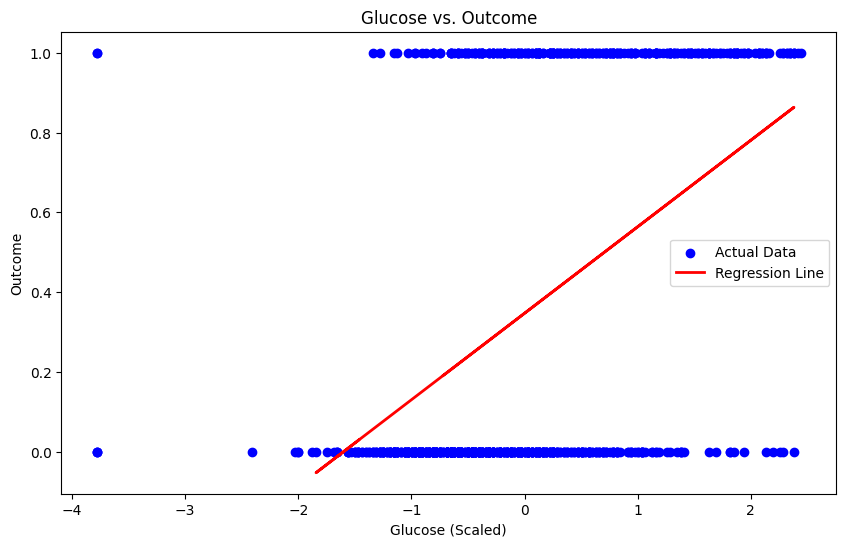

In [13]:
# Displaying regression line
plt.figure(figsize=(10, 6))
plt.scatter(data, target, color='blue', label="Actual Data")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")
plt.title("Glucose vs. Outcome")
plt.xlabel("Glucose (Scaled)")
plt.ylabel("Outcome")
plt.legend()
plt.show()